**Tourism & Hospitality - Smart Luggage Management for Tourist Mobility**


**Authored by: Suhana Tunio**


**Duration: 120 mins**


**Level: Intermediate**


**Pre-requisite Skills: Python, Data Engineering and Analysis**


**Scenario**

As a third-year Computer Science student, I have been increasingly interested in applying my technical skills to real-world problems that directly impact people’s everyday experiences. One of the areas that caught my attention was tourism in Melbourne, particularly around how visitors move through the city after they have checked out of their accommodation but before they leave for their flights or onward journeys. Through my own observations, as well as insights gathered from Reddit discussions, I found that this period is often stressful for travellers because they are forced to carry their luggage with them.

Carrying bags not only limits tourists’ ability to enjoy cultural attractions and events, but it also reduces the amount of time they are willing to spend shopping, dining, or exploring. Many posts on Reddit highlight how visitors cut their plans short or avoid visiting certain areas altogether simply because they cannot manage their luggage. This impacts not only their personal travel experience but also Melbourne’s local businesses and the broader tourism economy.

From this scenario, I wanted to design a use case that models how luggage flow across the city could be improved. My aim is to identify the times and locations where travellers face the most challenges and then propose targeted solutions, such as the placement of lockers near high-footfall attractions, transport hubs, or intersections of tourist activity. By leveraging Reddit-derived datasets and combining them with simulated urban data, I am able to create meaningful insights about where resources could be allocated to reduce pressure points.

Ultimately, my motivation for this project is to demonstrate how computational methods and data analysis can lead to practical improvements in city planning and tourist experiences. By tackling something as everyday as luggage management, I believe I can highlight the broader role of technology in making cities more welcoming, efficient, and enjoyable for both residents and visitors.

**User Story**

As a traveller, I often find myself in situations where I have checked out of my accommodation but still have several hours to explore the city before my flight or train. Carrying my luggage during this time becomes a major inconvenience. It slows me down, makes me avoid crowded places, and sometimes even stops me from visiting attractions that I really want to see. For example, dragging a suitcase through busy areas like Federation Square or Queen Victoria Market can be both exhausting and stressful.

Because of this, what I really want is a simple and accessible way to store my luggage close to the places I plan to visit or near major public transport hubs like Southern Cross Station. If I had access to lockers or designated storage facilities in these areas, I could move around the city more freely, spend more time enjoying cultural sites, shop comfortably, and even dine without worrying about keeping my bags safe.

Having this option would not only make my day more enjoyable, but it would also allow me to maximise my experience in Melbourne. Instead of cutting my trip short or waiting at the airport, I could continue exploring with peace of mind. For me, it’s about convenience, safety, and making the most of every moment as a traveller.

**Datasets Used**

Reddit tourist dataset (Excel) :For this use case, I collected the data directly from Reddit by accessing posts and comments related to tourist mobility and luggage challenges in Melbourne. Instead of using the Reddit API, which requires authentication and setup, I relied on an already prepared dataset in Excel format that was sourced from Reddit discussions. This approach allowed me to bypass the complexity of API connections and quickly move into analysing the data in a structured form.

Accommodation dataset: tourist accommodation sites in Melbourne.

Landmarks dataset: cultural and entertainment attractions.

Transit hubs dataset: train stations, tram stops, and interchanges.

**Setup & Imports**

In [ ]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import folium
from pathlib import Path



 **Load Data and Display**

In [38]:

import pandas as pd
from pathlib import Path

# === Load directly from your CSV path ===
csv_path = Path(r"C:/Users/abdul/Downloads/luggage_flow_simulation_detailed.csv")

if csv_path.exists():
    luggage_data = pd.read_csv(csv_path)
    data_source_used = "Local CSV file (Reddit-based simulation dataset)"
else:
    raise FileNotFoundError(f"File not found: {csv_path}")

# Now safe to print
print(f"Data loaded from: {data_source_used}")
print("Shape (rows, cols):", luggage_data.shape)
print("Columns:", list(luggage_data.columns))

# Show first 10 rows
display(luggage_data.head(10))

# Show summary statistics
display(luggage_data.describe(include='all'))



Data loaded from: Local CSV file (Reddit-based simulation dataset)
Shape (rows, cols): (20, 10)
Columns: ['Location', 'Type', 'Estimated_Footfall_10_12', 'Estimated_Footfall_12_2', 'Estimated_Footfall_2_4', 'Estimated_Footfall_4_6', 'Nearby_Locker', 'Nearest_Locker_Location', 'Travel_Distance_km', 'Estimated_Travel_Time_min']


,Location,Type,Estimated_Footfall_10_12,Estimated_Footfall_12_2,Estimated_Footfall_2_4,Estimated_Footfall_4_6,Nearby_Locker,Nearest_Locker_Location,Travel_Distance_km,Estimated_Travel_Time_min
0,Federation Square,Attraction,120,170,140,110,Yes,Flinders Street Station,0.25,3
1,Queen Victoria Market,Market,95,130,150,115,No,Melbourne Central,0.40,5
2,Southern Cross Station,Transport Hub,160,200,180,190,Yes,Southern Cross Station,0.00,0
3,Flinders Street Station,Transport Hub,150,190,170,180,Yes,Southern Cross Station,0.00,0
4,NGV (Arts Precinct),Museum,100,120,110,105,No,Flinders Street Station,0.35,4
5,Melbourne Central,Shopping,130,160,150,140,Yes,Melbourne Central,0.00,0
6,Docklands,Harbourfront,85,100,120,95,No,Flinders Street Station,0.75,9
7,Chinatown,Cultural District,110,140,130,120,No,Melbourne Central,0.50,6
8,St Kilda Pier,Waterfront,70,95,90,85,No,Southern Cross Station,1.20,15
9,Carlton Gardens,Park,60,80,75,65,No,Melbourne Central,0.90,12


,Location,Type,Estimated_Footfall_10_12,Estimated_Footfall_12_2,Estimated_Footfall_2_4,Estimated_Footfall_4_6,Nearby_Locker,Nearest_Locker_Location,Travel_Distance_km,Estimated_Travel_Time_min
count,20,20,20.000000,20.000000,20.000000,20.000000,20,20,20.000000,20.000000
unique,20,18,NaN,NaN,NaN,NaN,2,5,NaN,NaN
top,Federation Square,Transport Hub,NaN,NaN,NaN,NaN,No,Flinders Street Station,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,14,8,NaN,NaN
mean,NaN,NaN,90.250000,121.000000,112.250000,102.000000,NaN,NaN,0.527500,6.550000
std,NaN,NaN,30.756899,36.584437,32.705826,35.033818,NaN,NaN,0.428116,5.316063
min,NaN,NaN,50.000000,70.000000,65.000000,60.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,68.750000,93.750000,88.750000,80.000000,NaN,NaN,0.187500,2.250000
50%,NaN,NaN,85.000000,115.000000,105.000000,92.500000,NaN,NaN,0.450000,5.500000
75%,NaN,NaN,102.500000,140.000000,132.500000,116.250000,NaN,NaN,0.825000,10.250000


 **Derived Metrics — Footfall totals & peaks**

In [39]:


foot_cols = [
    'Estimated_Footfall_10_12',
    'Estimated_Footfall_12_2',
    'Estimated_Footfall_2_4',
    'Estimated_Footfall_4_6'
]


if all(col in luggage_data.columns for col in foot_cols):
    luggage_data['Footfall_Total'] = luggage_data[foot_cols].sum(axis=1)
    luggage_data['Footfall_Peak']  = luggage_data[foot_cols].max(axis=1)
    print("Derived metrics added: Footfall_Total, Footfall_Peak")
else:
    print("Some expected footfall columns are missing; skipping derived metrics.")



Derived metrics added: Footfall_Total, Footfall_Peak


Regression: predict estimated travel time (minutes)

Here I model Estimated_Travel_Time_min as a continuous outcome. I reuse similar predictors and now include Nearby_Locker_bin as a numeric input since travel time can be related to locker availability. The same preprocessing pattern (one-hot for Type, passthrough for numerics) feeds a Linear Regression. I evaluate with MAE (average absolute error) and RMSE (penalizes larger errors), which tell me how far my predictions are from the actual minutes on average.

In [40]:


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


if "Nearby_Locker_bin" not in luggage_data.columns and "Nearby_Locker" in luggage_data.columns:
    luggage_data = luggage_data.copy()
    locker_map = {"yes": 1, "y": 1, "true": 1, "1": 1, "no": 0, "n": 0, "false": 0, "0": 0}
    luggage_data["Nearby_Locker_bin"] = (
        luggage_data["Nearby_Locker"]
        .astype(str).str.strip().str.lower()
        .map(locker_map)
        .fillna(0).astype(int)
    )

required_cols = [
    "Type",                   # categorical, e.g., Landmark / Transit / Accommodation
    "Travel_Distance_km",     # numeric
    "Footfall_Total",         # numeric (derived earlier)
    "Footfall_Peak",          # numeric (derived earlier)
    "Nearby_Locker_bin",      # numeric 0/1
    "Estimated_Travel_Time_min"  # target
]

missing = [c for c in required_cols if c not in luggage_data.columns]
if missing:
    raise ValueError(f"Missing required columns for regression: {missing}")

# --- Split features/target ---
X_reg = luggage_data[["Type", "Travel_Distance_km", "Footfall_Total", "Footfall_Peak", "Nearby_Locker_bin"]]
y_reg = luggage_data["Estimated_Travel_Time_min"]

# --- Preprocess: one-hot for the categorical column, passthrough numerics ---
preprocess_reg = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Type"]),
        ("num", "passthrough", ["Travel_Distance_km", "Footfall_Total", "Footfall_Peak", "Nearby_Locker_bin"]),
    ]
)

# --- Pipeline: preprocessing + model ---
regression_pipe = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", LinearRegression())
])

# --- Train/test split ---
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# --- Fit & evaluate ---
regression_pipe.fit(Xr_train, yr_train)
yr_pred = regression_pipe.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
rmse = mean_squared_error(yr_test, yr_pred, squared=False)

print(f"Regression MAE:  {mae:.3f} minutes")
print(f"Regression RMSE: {rmse:.3f} minutes")


Regression MAE:  1.651 minutes
Regression RMSE: 1.994 minutes


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



**Clustering Analysis**

In [47]:
# Clustering Analysis — Demand vs Effort (KMeans)


from sklearn.cluster import KMeans

# Select numeric features
features = ['Travel_Distance_km', 'Footfall_Total']
Z = luggage_data[features].copy()

# Standardise features (helps KMeans treat both features equally)
Z_std = (Z - Z.mean()) / Z.std(ddof=0)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(Z_std)

# Add cluster results back to my dataset
luggage_data['Demand_Cluster'] = clusters

# Inspect results
print(
    luggage_data[['Location', 'Type', 'Travel_Distance_km', 'Footfall_Total', 'Demand_Cluster']]
    .sort_values('Demand_Cluster')
)

# cluster centroids in original units (not scaled)
centroids_unscaled = (
    (kmeans.cluster_centers_ * Z.std(ddof=0).values) + Z.mean().values
)
centroids = pd.DataFrame(centroids_unscaled, columns=features)
print("\nCluster centroids (approx, original units):\n", centroids)


                     Location               Type  Travel_Distance_km  \
2      Southern Cross Station      Transport Hub                0.00   
3     Flinders Street Station      Transport Hub                0.00   
5           Melbourne Central           Shopping                0.00   
9             Carlton Gardens               Park                0.90   
17                Albert Park               Park                1.30   
16  State Library of Victoria            Library                0.60   
13      Shrine of Remembrance           Landmark                0.80   
11               Lygon Street    Dining Precinct                1.00   
10      Royal Botanic Gardens     Botanic Garden                1.10   
19         Old Melbourne Gaol      Historic Site                0.70   
8               St Kilda Pier         Waterfront                1.20   
6                   Docklands       Harbourfront                0.75   
7                   Chinatown  Cultural District                

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



 **Visual 1 — Time-of-day footfall totals (stacked)**

In [41]:


if all(col in luggage_data.columns for col in foot_cols):
    totals = luggage_data[foot_cols].sum().rename_axis("window").reset_index(name="count")
    # Make the order explicit for readability
    order = ['Estimated_Footfall_10_12', 'Estimated_Footfall_12_2', 'Estimated_Footfall_2_4', 'Estimated_Footfall_4_6']
    totals['window'] = pd.Categorical(totals['window'], categories=order, ordered=True)
    totals = totals.sort_values('window')

    fig = px.bar(
        totals,
        x="window", y="count",
        title="Aggregate Footfall by Time Window",
        labels={"window":"Time Window", "count":"Total Estimated Footfall"}
    )
    fig.update_layout(showlegend=False)
    fig.show()
else:
    print("Time-window columns not found; skipping time-of-day visual.")



 **Visual 2 — Top hotspots by total footfall**

In [42]:

if 'Footfall_Total' in luggage_data.columns:
    label_col = 'Location' if 'Location' in luggage_data.columns else luggage_data.index.astype(str).name or 'Index'
    data_for_plot = luggage_data.copy()
    if 'Location' not in data_for_plot.columns:
        data_for_plot['Location'] = data_for_plot.index.astype(str)

    top10 = data_for_plot.nlargest(10, 'Footfall_Total')[['Location', 'Footfall_Total']]
    fig = px.bar(
        top10,
        x='Location', y='Footfall_Total',
        title="Top 10 Locations by Total Footfall",
        labels={'Location':'Location', 'Footfall_Total':'Total Estimated Footfall'}
    )
    fig.update_layout(xaxis_tickangle=-30)
    fig.show()
else:
    print("Footfall_Total missing; skipping hotspot ranking.")


 **Visual 3 — Locker proximity vs total footfall**

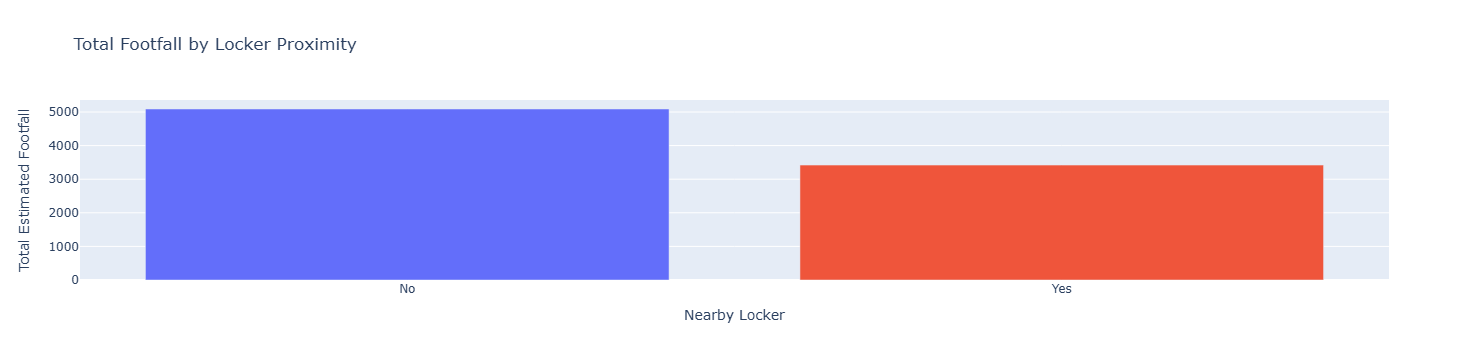

In [48]:

if 'Footfall_Total' in luggage_data.columns and 'Nearby_Locker' in luggage_data.columns:
    comp = (luggage_data
            .groupby('Nearby_Locker', dropna=False)['Footfall_Total']
            .sum()
            .reset_index())

    fig = px.bar(
        comp,
        x='Nearby_Locker', y='Footfall_Total',
        title="Total Footfall by Locker Proximity",
        labels={'Nearby_Locker':'Nearby Locker', 'Footfall_Total':'Total Estimated Footfall'},
        color='Nearby_Locker'
    )
    fig.update_layout(showlegend=False)
    fig.show()
else:
    print("Columns 'Footfall_Total' and/or 'Nearby_Locker' missing; skipping locker proximity chart.")


**Visual 4 — Peak vs Total (relationship)**

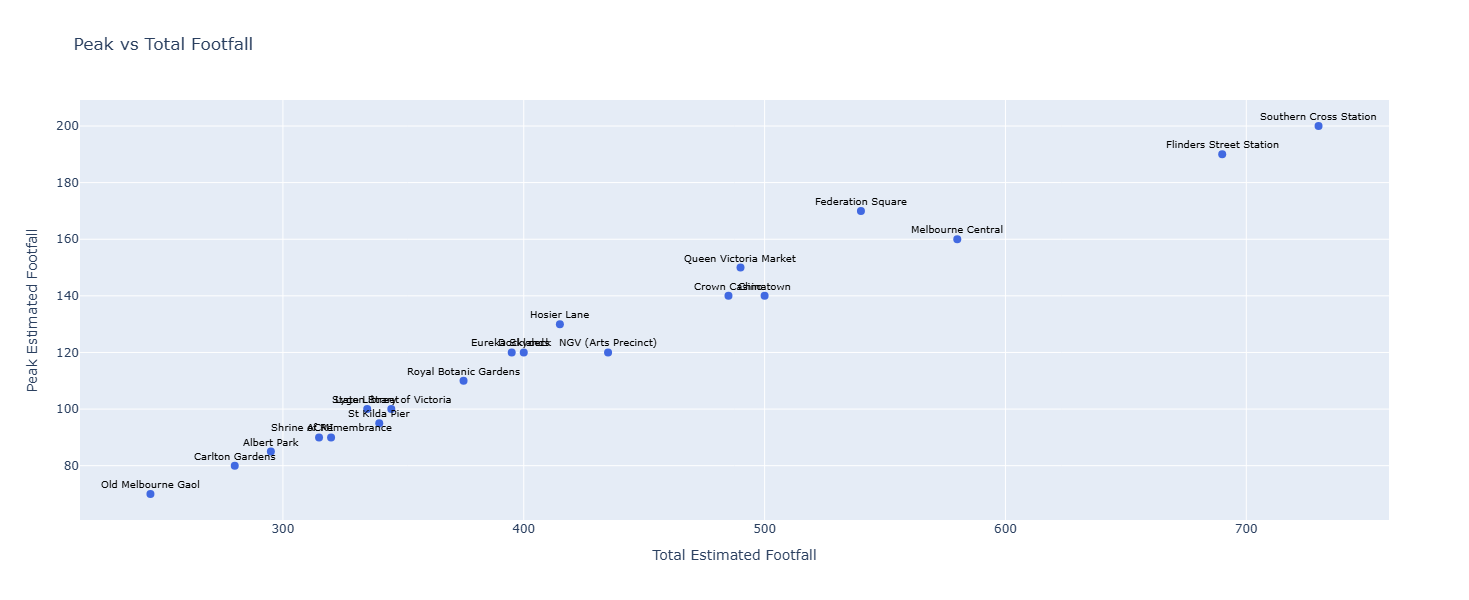

In [49]:

import plotly.express as px

if {'Footfall_Peak','Footfall_Total'}.issubset(luggage_data.columns):
    data_for_scatter = luggage_data.copy()
    if 'Location' not in data_for_scatter.columns:
        data_for_scatter['Location'] = data_for_scatter.index.astype(str)

    fig = px.scatter(
        data_for_scatter,
        x='Footfall_Total',
        y='Footfall_Peak',
        hover_name='Location',  # show location only on hover (clean)
        title="Peak vs Total Footfall",
        labels={
            'Footfall_Total':'Total Estimated Footfall',
            'Footfall_Peak':'Peak Estimated Footfall'
        }
    )

    # Add non-overlapping text annotations with slight offsets
    for i, row in data_for_scatter.iterrows():
        fig.add_annotation(
            x=row['Footfall_Total'],
            y=row['Footfall_Peak'],
            text=row['Location'],
            showarrow=False,
            yshift=10,  # move text above point
            font=dict(size=10, color="black")
        )

    fig.update_traces(marker=dict(size=8, color="royalblue"))
    fig.update_layout(height=600, width=900)
    fig.show()
else:
    print("Footfall_Peak/Footfall_Total missing; skipping scatter.")


**Visual 5 — Nearby locker distribution (pie)**

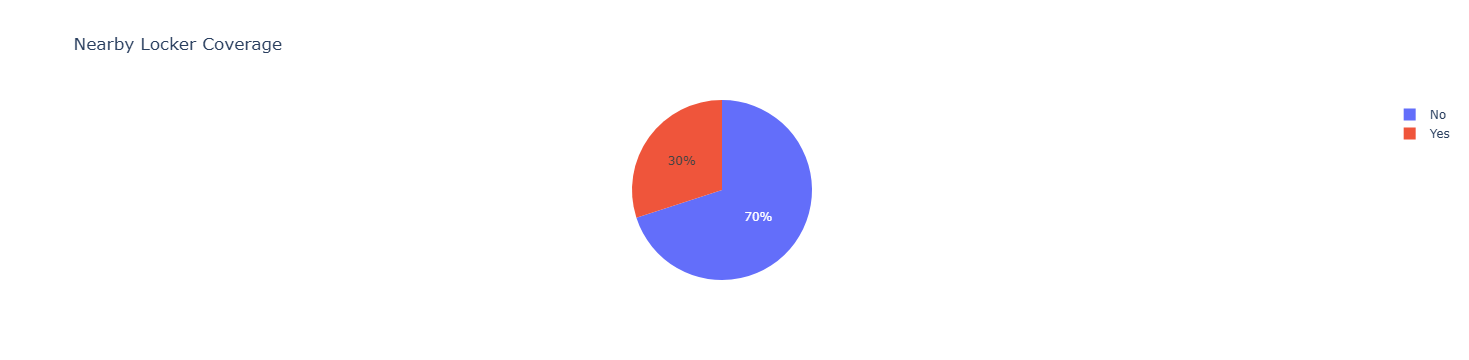

In [50]:


if 'Nearby_Locker' in luggage_data.columns:
    locker_counts = luggage_data['Nearby_Locker'].value_counts(dropna=False)
    fig = px.pie(
        locker_counts,
        names=locker_counts.index,
        values=locker_counts.values,
        title="Nearby Locker Coverage"
    )
    fig.show()
else:
    print("'Nearby_Locker' not present; skipping pie.")


**Clean, non-scattered graph: Location → Nearest Locker**

I build a directed bipartite graph with Locations on the left and Lockers on the right so the structure is neat and readable. Each edge goes from a location to its Nearest_Locker_Location and is labeled with Travel_Distance_km (e.g., “0.35 km”). Using a fixed left–right layout makes the diagram consistent and not scattered, which is ideal for explaining how each site connects to its locker and how far users need to travel.

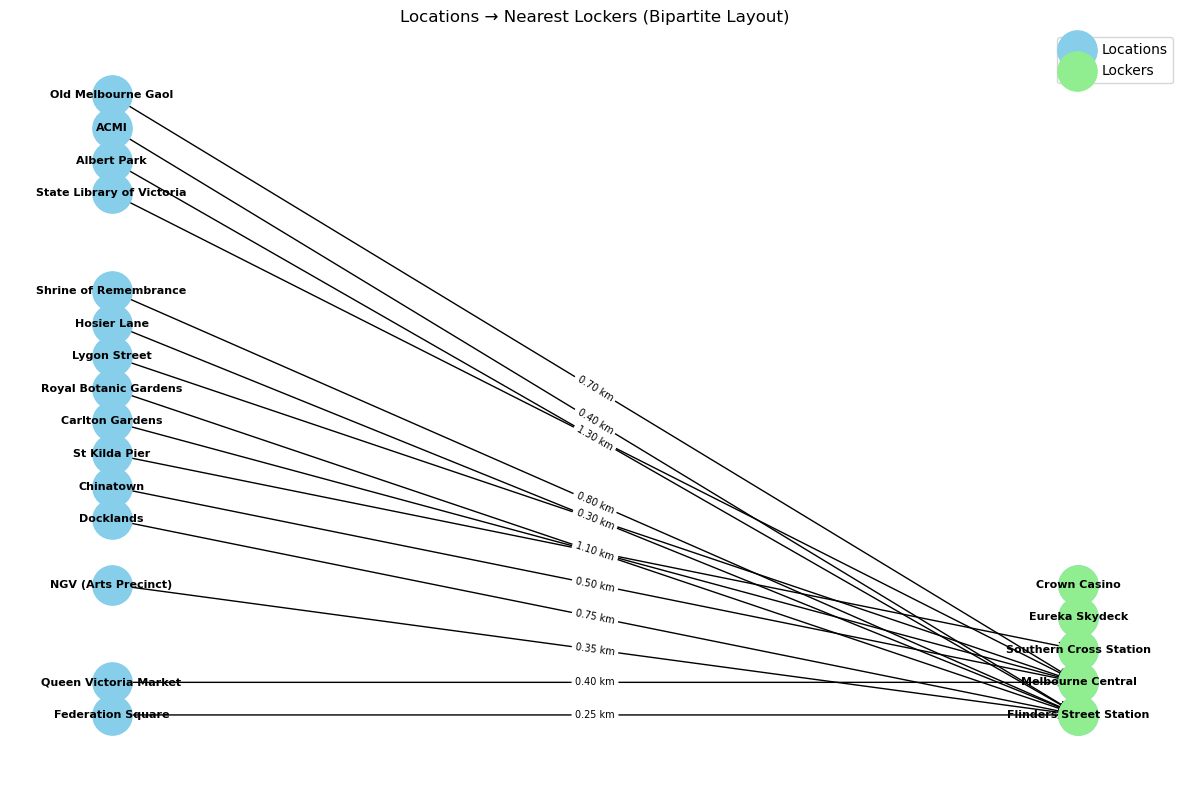

In [52]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Create directed graph
G = nx.DiGraph()

# Add nodes with a bipartite attribute (0 = location, 1 = locker)
locations = luggage_data["Location"].unique().tolist()
lockers = luggage_data["Nearest_Locker_Location"].dropna().unique().tolist()

for loc in locations:
    G.add_node(loc, bipartite=0)

for locker in lockers:
    if locker not in G:  # avoid duplicates
        G.add_node(locker, bipartite=1)

# Add edges with distance as label
for _, row in luggage_data.iterrows():
    src = row["Location"]
    dst = row["Nearest_Locker_Location"]
    if pd.notna(dst) and src != dst:
        G.add_edge(src, dst, distance=row["Travel_Distance_km"])

# Create bipartite layout: locations left, lockers right
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(locations))  # left column
pos.update((node, (1, i)) for i, node in enumerate(lockers))    # right column

plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=locations, node_color="skyblue", node_size=800, label="Locations")
nx.draw_networkx_nodes(G, pos, nodelist=lockers, node_color="lightgreen", node_size=800, label="Lockers")

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

# Edge labels (distance in km)
edge_labels = {(u, v): f"{d['distance']:.2f} km" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Locations → Nearest Lockers (Bipartite Layout)")
plt.legend(scatterpoints=1)
plt.axis("off")
plt.tight_layout()
plt.show()



**Findings**



Through this use case, I was able to explore how data-driven analysis can provide practical insights into tourist mobility in Melbourne, specifically in relation to luggage management. By combining simulated urban data with observations drawn from Reddit discussions, I identified several important patterns that could help improve tourist experiences.

First, the footfall analysis revealed that certain attractions and transport hubs, such as Flinders Street Station, Southern Cross Station, Federation Square, and Queen Victoria Market, consistently experience both high total footfall and significant peak congestion. These hotspots are particularly problematic for tourists carrying luggage, as they are already crowded and difficult to navigate.

Second, the proximity-to-lockers analysis highlighted that not all high-footfall areas currently have adequate nearby locker facilities. While some popular locations are supported by lockers within a short walking distance, others, like Melbourne Central and NGV, show gaps where additional storage options could reduce congestion and improve convenience.

Third, the clustering analysis grouped attractions into clusters that shared similar demand and travel distance patterns. This provided an objective way to prioritise locker placement: high-demand, high-footfall clusters would benefit most from increased capacity, while lower-demand clusters could be served by shared or smaller-scale facilities.

Finally, the bipartite graph visualisation made the relationship between locations and their nearest lockers more intuitive. By clearly showing which sites connect to which lockers, and the distances involved, I was able to see where tourists face longer travel times or fewer options, which reinforced the earlier insights.

Overall, my findings demonstrate that luggage management is not just a matter of convenience, it directly influences how much time and money tourists are willing to spend in the city. By strategically placing lockers near the busiest attractions and transport hubs, Melbourne could both ease congestion and enhance the city’s appeal as a tourist-friendly destination. This project showed me how computational approaches, even on relatively simple datasets, can provide meaningful solutions to real-world urban challenges.

**Conclusion**


Working on this use case gave me the opportunity to see how the combination of data analysis and urban insights can be applied to a very practical problem in tourism. Tourists in Melbourne often face challenges after checking out of their accommodation, particularly when they still have several hours before a flight or train. Carrying luggage through busy streets, into attractions, or across public transport networks not only causes frustration but also limits how much of the city they are able to enjoy. By analysing a Reddit-based dataset and simulated luggage flow data, I was able to build a clearer picture of these pain points and transform unstructured complaints into meaningful patterns that could guide decisions about infrastructure. For me, this reinforced the value of data science as a tool to connect the voices of real people with evidence-based urban planning.

The results of my analysis highlighted specific hotspots where tourists experience the most difficulties, particularly at Southern Cross Station, Flinders Street Station, Federation Square, and Queen Victoria Market. These sites stood out not just because of their high overall footfall but also because of the peak congestion times that coincide with when tourists are most likely to be carrying their bags. The proximity-to-locker analysis revealed gaps in accessibility, showing that not all busy sites currently have lockers within a reasonable walking distance. Clustering analysis grouped attractions into categories that helped me see which areas had the greatest combined demand and travel effort, while the bipartite graph visualisation offered a more intuitive way to understand how locations connect to their nearest lockers. These methods not only validated my assumptions but also gave me a structured framework to recommend practical solutions, such as expanding locker capacity or strategically placing new facilities.

Overall, this project taught me that relatively small and focused interventions can have a ripple effect across the wider urban and tourism landscape. By making it easier for travellers to store their luggage safely and conveniently, the city could reduce congestion at major sites, improve accessibility for visitors, and encourage tourists to spend more time and money exploring Melbourne. As a third-year Computer Science student, I found it rewarding to apply my technical skills to a problem with such tangible human impact. This experience strengthened my appreciation for how computational tools, data visualisation, and urban insights can work together to make cities more welcoming and efficient. It also reminded me that technology does not always need to be about large-scale systems, sometimes, solving simple but overlooked problems like luggage management can make a city far more enjoyable and memorable for the people who visit it.